In [ ]:
#Activity 1
#Adornado B. Cabalbag Jr. - BSIT 3B

In [ ]:
# Install PySpark
!pip install pyspark
# Install Matplotlib for visualization
!pip install matplotlib

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
# Step 1: Initialize Spark Session
spark = SparkSession.builder \
.appName("SimpleDataAnalysis") \
.getOrCreate()

In [ ]:
# Step 2: Create a Sample DataFrame
data = [
("Alice", "HR", 3000),
("Bob", "IT", 4000),
("Charlie", "HR", 3500),
("David", "IT", 4500),
("Eva", "Finance", 5000),
("Frank", "Finance", 5500),
("Grace", "IT", 3800),
]

In [ ]:
columns = ["Name", "Department", "Salary"]
df = spark.createDataFrame(data, columns)

spark.createDataFrame(data, columns)

df.show();

+-------+----------+------+
|   Name|Department|Salary|
+-------+----------+------+
|  Alice|        HR|  3000|
|    Bob|        IT|  4000|
|Charlie|        HR|  3500|
|  David|        IT|  4500|
|    Eva|   Finance|  5000|
|  Frank|   Finance|  5500|
|  Grace|        IT|  3800|
+-------+----------+------+



In [ ]:
# Step 3: Perform Data Analysis
# Calculate average salary by department
avg_salary_df = df.groupBy("Department").avg("Salary").withColumnRenamed("avg(Salary)", "Average Salary")

# Show the results
avg_salary_df.show()


+----------+--------------+
|Department|Average Salary|
+----------+--------------+
|        HR|        3250.0|
|        IT|        4100.0|
|   Finance|        5250.0|
+----------+--------------+



In [ ]:
# Step 4: Prepare Data for Visualization
# Collect the data to the driver
avg_salary_data = avg_salary_df.collect()

# Extract departments and average salaries
departments = [row["Department"] for row in avg_salary_data]
avg_salaries = [row["Average Salary"] for row in avg_salary_data]



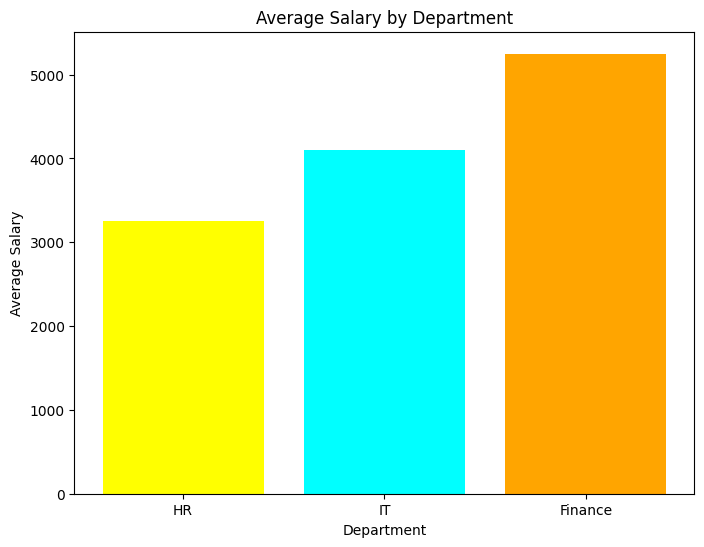

In [ ]:
# Step 5: Visualize the Results
plt.figure(figsize=(8, 6))
plt.bar(departments, avg_salaries, color=["yellow", "cyan", "orange"])
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()


In [ ]:
# Step 6: Stop the Spark session
spark.stop()